# Creating a map using geopandas
There are lots of benefits of using Choropleth maps (except for having to pronounce it of course!) 


# Step 1: import packages

As ususal let's first import our packages. Everything is as usual, except we'll also be using a new packaged called geopandas

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import geopandas as gpd

# Step 3: import your shapefile for UK local authorities. 

Shapefiles for the UK are easily available from The Open Geography portal, a website from the ONS. 
You can check that out here: https://geoportal.statistics.gov.uk/

There are lots of free shapefiles online for other countries or for a world map. 

In [11]:
UK = "Local_Authority_Districts__April_2019__UK_BFC_v2-shp/Local_Authority_Districts__April_2019__UK_BFC_v2.shp"

map_df = gpd.read_file(UK)

map_df.head(n=4)

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.6762,9.355951e+07,71707.162397,"MULTIPOLYGON (((450156.801 525940.201, 450154...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,5.388858e+07,43840.876046,"MULTIPOLYGON (((451995.400 521026.897, 452169...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.5675,2.448203e+08,97993.352238,"MULTIPOLYGON (((451747.397 520561.100, 451792...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.5569,2.049622e+08,119581.539702,"MULTIPOLYGON (((450252.196 525902.201, 450241...."


In [12]:
map_df.shape

(382, 11)

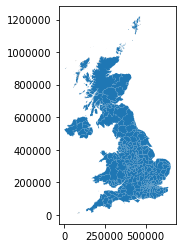

In [13]:
map_df.plot()

In [15]:
map_df = map_df[22:23] #only want to keep the 1 row with Bristol
map_df.head(n=6)

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
22,23,E06000023,"Bristol, City of",None,359990,174846,-2.57742,51.4711,1.097001e+08,109722.732804,"MULTIPOLYGON (((347677.098 177524.104, 347636...."


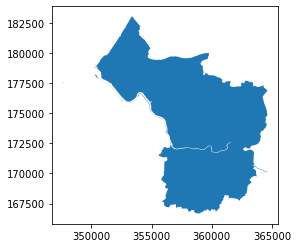

In [16]:
map_df.plot()

# Step 4: Merge your dataframe with the shapefile

In [17]:
merged = map_df
merged.head()

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
22,23,E06000023,"Bristol, City of",None,359990,174846,-2.57742,51.4711,1.097001e+08,109722.732804,"MULTIPOLYGON (((347677.098 177524.104, 347636...."


# Step 5: Begin to 'assemble' your map 

(346773.98287999997, 365467.82112, 165818.20431999993, 183873.4960800011)

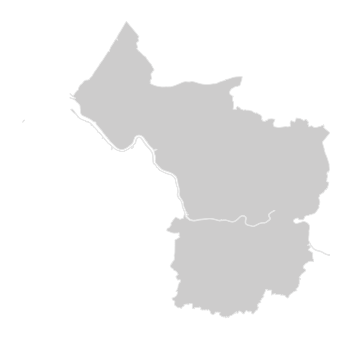

In [38]:
# set a variable that will call whatever column we want to visualise on the map
# In this case, it is claimants as a share of the population
claimant = 'LAD19CD'

# set the range for the choropleth
vmin, vmax = 2, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(color='#CDCCCC', linestyle='solid', linewidth=0.8, ax=ax, edgecolor='0.9')

# remove the axis
ax.axis('off')

#fig.savefig('map_bristol.png', dpi=300)